In [ ]:
from pickle import TRUE
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.1


train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:10<00:00, 911kB/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 11.4MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)


  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)

    return out

model = NeuralNet(input_size,hidden_size,num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(),lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_loader):
    images = images.reshape(-1,784).to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs,labels)

    loss.backward()
    optim.step()
    optim.zero_grad()

    if (i+1) % 100 == 0 :
      print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}, loss: {loss.item():.4f}]')




Epoch [1/2], Step [100/600, loss: 0.6299]
Epoch [1/2], Step [200/600, loss: 0.6104]
Epoch [1/2], Step [300/600, loss: 0.5276]
Epoch [1/2], Step [400/600, loss: 0.5280]
Epoch [1/2], Step [500/600, loss: 0.1496]
Epoch [1/2], Step [600/600, loss: 0.2983]
Epoch [2/2], Step [100/600, loss: 0.4347]
Epoch [2/2], Step [200/600, loss: 0.2605]
Epoch [2/2], Step [300/600, loss: 0.2049]
Epoch [2/2], Step [400/600, loss: 0.1789]
Epoch [2/2], Step [500/600, loss: 0.2196]
Epoch [2/2], Step [600/600, loss: 0.2178]


In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = len(test_loader.dataset)


  for images, labels in test_loader:
    images = images.reshape(-1,784).to(device)
    labels = labels.to(device)

    outputs = model(images)

    _, predicted = torch.max(outputs,1)
    n_correct += (predicted==labels).sum().item()


accuracy= n_correct/n_samples
print(f'Accuracy of the network on the {n_samples} test images: {100*accuracy}%')



Accuracy of the network on the 10000 test images: 93.8%


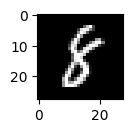

8


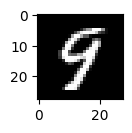

9


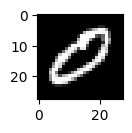

0


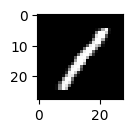

1


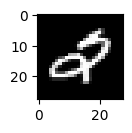

2


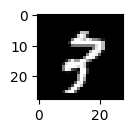

9


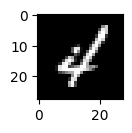

4


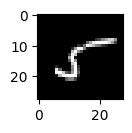

5


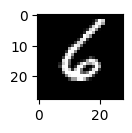

6


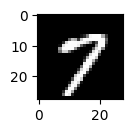

7


In [18]:
for images, labesl in test_loader:
  images = images.reshape(-1,784).to(device)
  labels = labels.to(device)

  outputs = model(images)

outputs = outputs.detach().cpu().numpy()

outputs = np.argmax(outputs,axis=1)
images = images.detach().cpu().numpy()

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(images[i].reshape(28,28),cmap='gray')
  plt.show()
  print(outputs[i])